# Reading and writing LAS files

This notebook goes with [the Agile blog post](https://agilescientific.com/blog/2017/10/23/x-lines-of-python-load-curves-from-las) of 23 October 2017.

You'll need `welly` in your environment:

    pip install welly
    
This will also install the latest versions of `striplog` and `lasio`.

In [5]:
!dir data/*.LAS

Invalid switch - "*.LAS".


## Load the LAS file with `lasio`

In [8]:
import lasio

l = lasio.read('data/GN3.LAS')

Header section Parameter regexp=~P was not found.


That's it! But the object itself doesn't tell us much — it's really just a container:

In [9]:
l.header

{'Version': [HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS LOG ASCII STANDARD -V...),
  HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=ONE LINE PER DEPTH STEP)],
 'Well': [HeaderItem(mnemonic=STRT, unit=m, value=8.9916, descr=START DEPTH),
  HeaderItem(mnemonic=STEP, unit=m, value=0.1524, descr=STEP DEPTH),
  HeaderItem(mnemonic=STOP, unit=m, value=2706.1668, descr=STOP DEPTH),
  HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=NULL VALUE),
  HeaderItem(mnemonic=COMP, unit=, value=, descr=COMPANY),
  HeaderItem(mnemonic=WELL, unit=, value=, descr=WELL),
  HeaderItem(mnemonic=LOC, unit=, value=, descr=LOCATION - AREA),
  HeaderItem(mnemonic=FLD, unit=, value=, descr=FIELD),
  HeaderItem(mnemonic=CTRY, unit=, value=, descr=COUNTRY),
  HeaderItem(mnemonic=DATE, unit=, value=, descr=WELL DATE),
  HeaderItem(mnemonic=XWELL, unit=m, value=, descr=X POS),
  HeaderItem(mnemonic=YWELL, unit=m, value=, descr=Y POS),
  HeaderItem(mnemonic=EDF, unit=, value=6.1, descr=DERRICK FLOOR

In [10]:
l.curves

[CurveItem(mnemonic=DEPT, unit=m, value=, descr=1      DEPTH, original_mnemonic=DEPT, data.shape=(17699,)),
 CurveItem(mnemonic=DTCO, unit=us/ft, value=, descr=2      p_Sonic, original_mnemonic=DTCO, data.shape=(17699,)),
 CurveItem(mnemonic=VP, unit=km/s, value=, descr=3      Vp, original_mnemonic=VP, data.shape=(17699,)),
 CurveItem(mnemonic=DTSM, unit=us/ft, value=, descr=4      s_Sonic, original_mnemonic=DTSM, data.shape=(17699,)),
 CurveItem(mnemonic=VS, unit=km/s, value=, descr=5      Vs, original_mnemonic=VS, data.shape=(17699,)),
 CurveItem(mnemonic=RHOB, unit=g/cm3, value=, descr=6      Rho, original_mnemonic=RHOB, data.shape=(17699,)),
 CurveItem(mnemonic=CGR, unit=API, value=, descr=7      GR, original_mnemonic=CGR, data.shape=(17699,)),
 CurveItem(mnemonic=VWCL, unit=fract, value=, descr=8      Volume, original_mnemonic=VWCL, data.shape=(17699,)),
 CurveItem(mnemonic=PHIT, unit=fract, value=, descr=9      Por, original_mnemonic=PHIT, data.shape=(17699,))]

## Look at the WELL section of the header

In [11]:
l.header['Well']

[HeaderItem(mnemonic=STRT, unit=m, value=8.9916, descr=START DEPTH),
 HeaderItem(mnemonic=STEP, unit=m, value=0.1524, descr=STEP DEPTH),
 HeaderItem(mnemonic=STOP, unit=m, value=2706.1668, descr=STOP DEPTH),
 HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=NULL VALUE),
 HeaderItem(mnemonic=COMP, unit=, value=, descr=COMPANY),
 HeaderItem(mnemonic=WELL, unit=, value=, descr=WELL),
 HeaderItem(mnemonic=LOC, unit=, value=, descr=LOCATION - AREA),
 HeaderItem(mnemonic=FLD, unit=, value=, descr=FIELD),
 HeaderItem(mnemonic=CTRY, unit=, value=, descr=COUNTRY),
 HeaderItem(mnemonic=DATE, unit=, value=, descr=WELL DATE),
 HeaderItem(mnemonic=XWELL, unit=m, value=, descr=X POS),
 HeaderItem(mnemonic=YWELL, unit=m, value=, descr=Y POS),
 HeaderItem(mnemonic=EDF, unit=, value=6.1, descr=DERRICK FLOOR ELEVATION)]

## Look at the curve data

The curves are all present one big NumPy array:

In [12]:
l.data

array([[   8.9916,       nan,       nan, ...,       nan,       nan,
              nan],
       [   9.144 ,       nan,       nan, ...,       nan,       nan,
              nan],
       [   9.2964,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [2705.862 ,       nan,       nan, ...,       nan,       nan,
              nan],
       [2706.0144,       nan,       nan, ...,       nan,       nan,
              nan],
       [2706.1668,       nan,       nan, ...,       nan,       nan,
              nan]])

In [13]:
l.curves

[CurveItem(mnemonic=DEPT, unit=m, value=, descr=1      DEPTH, original_mnemonic=DEPT, data.shape=(17699,)),
 CurveItem(mnemonic=DTCO, unit=us/ft, value=, descr=2      p_Sonic, original_mnemonic=DTCO, data.shape=(17699,)),
 CurveItem(mnemonic=VP, unit=km/s, value=, descr=3      Vp, original_mnemonic=VP, data.shape=(17699,)),
 CurveItem(mnemonic=DTSM, unit=us/ft, value=, descr=4      s_Sonic, original_mnemonic=DTSM, data.shape=(17699,)),
 CurveItem(mnemonic=VS, unit=km/s, value=, descr=5      Vs, original_mnemonic=VS, data.shape=(17699,)),
 CurveItem(mnemonic=RHOB, unit=g/cm3, value=, descr=6      Rho, original_mnemonic=RHOB, data.shape=(17699,)),
 CurveItem(mnemonic=CGR, unit=API, value=, descr=7      GR, original_mnemonic=CGR, data.shape=(17699,)),
 CurveItem(mnemonic=VWCL, unit=fract, value=, descr=8      Volume, original_mnemonic=VWCL, data.shape=(17699,)),
 CurveItem(mnemonic=PHIT, unit=fract, value=, descr=9      Por, original_mnemonic=PHIT, data.shape=(17699,))]

Or we can go after a single curve object:

In [22]:
l.curves.CGR.data

array([nan, nan, nan, ..., nan, nan, nan])

And there's a shortcut to its data:

In [23]:
l['CGR']

array([nan, nan, nan, ..., nan, nan, nan])

...so it's easy to make a plot against depth:

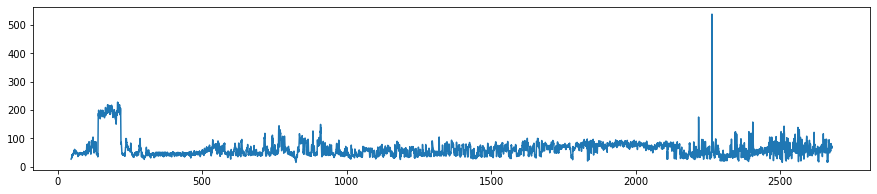

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,3))
plt.plot(l['DEPT'], l['CGR'])
plt.show()

## Inspect the curves as a `pandas` dataframe

In [25]:
l.df().head()

,DTCO,VP,DTSM,VS,RHOB,CGR,VWCL,PHIT
DEPT,,,,,,,,
8.9916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.2964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.4488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.6012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


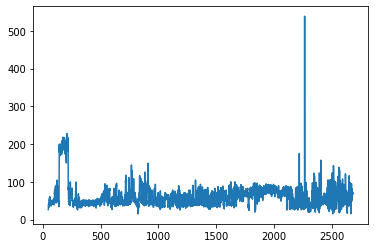

In [26]:
plt.plot(l.df().CGR)

## Load the LAS file with `welly` 

`welly` uses `lasio` to load the file. Then it adds some handy things:

- Richer `curve` objects (subclassed NumPy arrays), with smoothing, resampling, plotting, and more.
- Curve alias lists.
- Curve quality checking.
- Remapping and transforming fields during LAS load.
- A `project` object for managing several wells at once.
- A `well.location` property, with a CRS and directional survey.
- Jupyter Notebook friendly object representations.

In [27]:
from welly import Well

w = Well.from_las('data/GN3.LAS')

Header section Parameter regexp=~P was not found.


`welly` Wells know how to display some basics:

In [28]:
w

Well(uwi: '', 8 curves: ['DTCO', 'VP', 'DTSM', 'VS', 'RHOB', 'CGR', 'VWCL', 'PHIT'])

And the `Well` object also has `lasio`'s access to a pandas DataFrame:

In [29]:
w.df().head()

,DTCO,VP,DTSM,VS,RHOB,CGR,VWCL,PHIT
Depth,,,,,,,,
8.9916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.2964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.4488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.6012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Look at `welly`'s Curve object

The `data` attribute is just a dictionary:

In [30]:
w.data

{'DTCO': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'VP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTSM': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'VS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RHOB': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CGR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'VWCL': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PHIT': Curve([nan, nan, nan, ..., nan, nan, nan])}

Like the `Well`, a `Curve` object can report a bit about itself:

In [32]:
gr = w.data['CGR']
gr

Curve([nan, nan, nan, ..., nan, nan, nan])

To get at the depth in a `lasio` object, you have to find the `DEPT` curve:

In [33]:
w.las.curves.DEPT

CurveItem(mnemonic=DEPT, unit=m, value=, descr=1      DEPTH, original_mnemonic=DEPT, data.shape=(17699,))

One important thing about `Curve` objects is that each one knows its own depths — they are stored as a property called `basis`. (It's not actually stored, but computed on demand from the start depth, the sample interval (which must be constant for the whole curve) and the number of samples in the object.)

In [34]:
gr.basis

array([   8.9916,    9.144 ,    9.2964, ..., 2705.862 , 2706.0144,
       2706.1668])

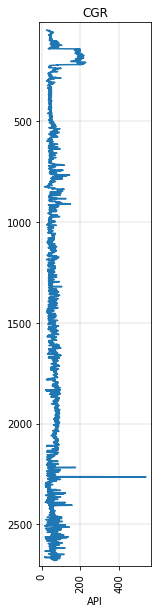

In [36]:
gr.plot()

## Plot part of a curve

We'll grab the interval from 300 m to 1000 m and plot it.

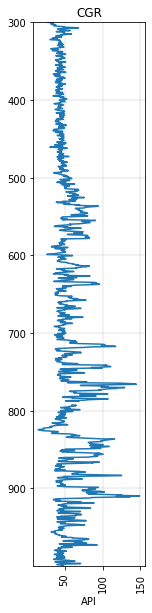

In [37]:
gr.to_basis(start=300, stop=1000).plot()  # Line 8.

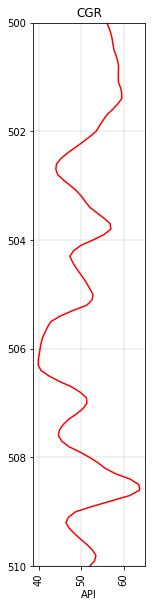

In [38]:
gr.to_basis(start=500, stop=510, step=0.1).plot(color='r')

## Curve quality

We can run qualaity tests on wells or on projects.

In [39]:
from IPython.display import HTML
import welly.quality as qc

tests = {
    'each': [qc.no_gaps, qc.no_monotonic],
    'GR': [qc.all_positive]
}

results = w.qc_table_html(tests=tests)

HTML(results)

Curve,Passed,Score,no_gaps,no_monotonic
DTCO,1 / 2,0.500,False,True
VP,1 / 2,0.500,False,True
DTSM,1 / 2,0.500,False,True
VS,1 / 2,0.500,False,True
RHOB,1 / 2,0.500,False,True
CGR,1 / 2,0.500,False,True
VWCL,1 / 2,0.500,False,True
PHIT,1 / 2,0.500,False,True


## Smooth a curve

Curve objects are, fundamentally, NumPy arrays. But they have some extra tricks. We've already seen `Curve.plot()`. 

Using the `Curve.smooth()` method, we can easily smooth a curve, eg by 15 m (passing `samples=True` would smooth by 15 samples):

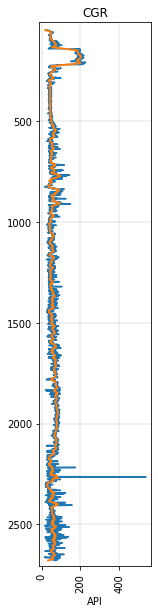

In [40]:
sm = gr.smooth(window_length=15, samples=False)

fig, ax = plt.subplots(figsize=(2,10))
ax = gr.plot(ax=ax)
ax = sm.plot(ax=ax, lw=2)

We can save this as a new LAS file:

In [41]:
x = Well(params={'name': w.header.name})
x.header = w.header
x.location = w.location

In [43]:
x.data['CGR'] = w.data['CGR']

x.data['CGR_smooth'] = sm

x.data

{'CGR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CGR_smooth': Curve([nan, nan, nan, ..., nan, nan, nan])}

In [31]:
x.to_las('../data/x.las')

## Export a set of curves as a matrix

`welly` lets you specify which curves you want (optionally using aliases like GR1, GRC, NGC, etc for GR), resample the data, or specify a start and stop depth. This method is also wrapped by `Project.data_as_matrix()` which is nice because it ensures that all the wells are exported at the same sample interval.

Here are the curves in this well:

In [44]:
w.data.keys()

dict_keys(['DTCO', 'VP', 'DTSM', 'VS', 'RHOB', 'CGR', 'VWCL', 'PHIT'])

Let's say we only want to export a few curves for our machine learning project:

In [47]:
keys = ['DTCO', 'VP', 'DTSM', 'VS', 'RHOB', 'CGR', 'VWCL', 'PHIT']

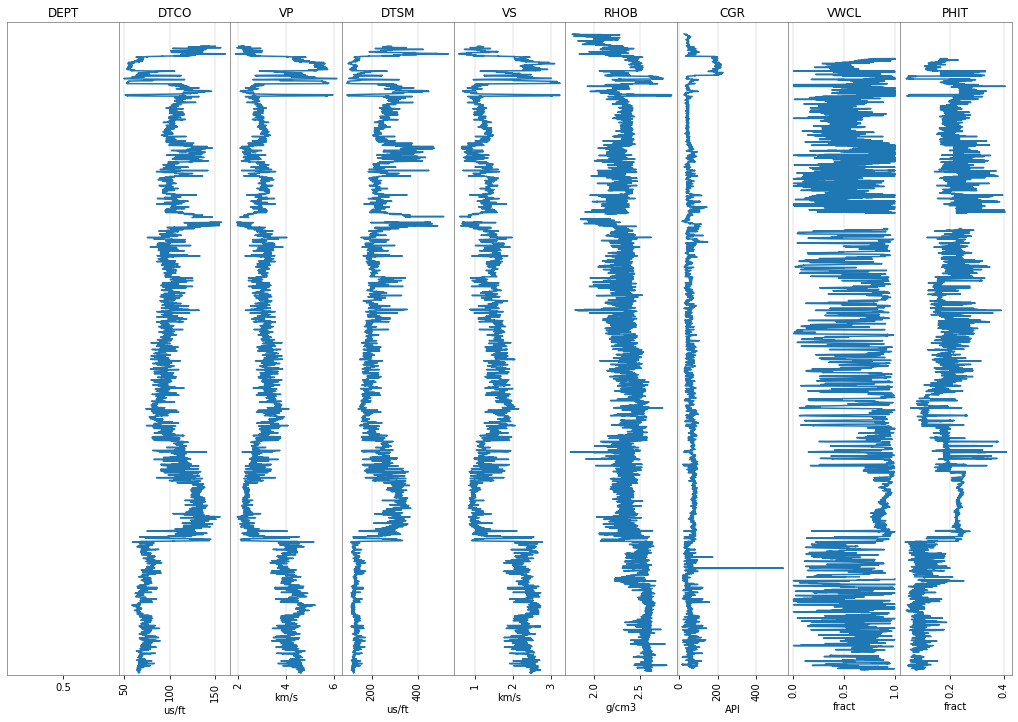

In [49]:
w.plot(tracks=['DEPT']+keys)

In [35]:
X, basis = w.data_as_matrix(keys=keys, start=275, stop=1850, step=0.5, return_basis=True)

In [36]:
w.data['CALI'].shape

(12718,)

So CALI had 12,718 points in it... since we downsampled to 0.5 m and removed the top and tail, we should have substantially fewer points:

In [37]:
X.shape

(3151, 5)

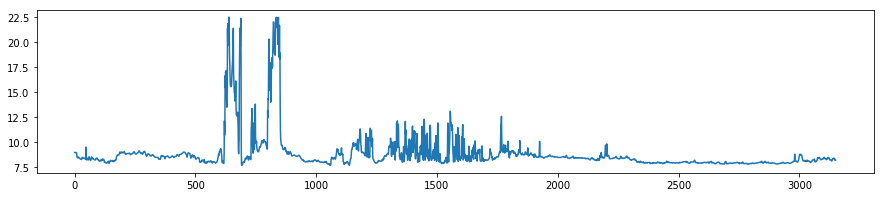

In [38]:
plt.figure(figsize=(15,3))
plt.plot(X.T[0])
plt.show()

## The `Project` class

We can also load multiple wells into a Welly `Project`:

In [1]:
from welly import Project

p = Project.from_las('../data/*.las')

5it [00:06,  1.04s/it]Header section Parameter regexp=~P was not found.
6it [00:08,  1.33s/it]


In [2]:
p

Index,UWI,Data,Curves
0,4004614505993500,7 curves,"SP, NORM, ILD, CALI, RHOB, DT, GR"
1,,13 curves,"CALD, CALS, DRHO, DT, GRD, GRS, ILD, ILM, LL8, NPHILS, NPHISS, RHOB, SP"
2,,12 curves,"CALD, CALS, DRHO, DT, GRD, GRS, ILD, ILM, LL8, NPHISS, RHOB, SP"
3,Long = 63* 45'24.460 W,2 curves,"GR, GR_SMOOTH"
4,303N764340060300,22 curves,"BS, CALI, CHR1, CHR2, CHRP, CHRS, DRHO, DT1R, DT2, DT2R, DT4P, DT4S, GR, HD1, HD2, HD3, NPOR, PEF, RHOB, SPR1, TENS, VPVS"
5,,12 curves,"BS, CALI, CALS, DEPOFFCP, DRHO, DT, GR, ILD, ILM, NPHISS, PE, RHOB"


Projects are really just lists of wells:

In [5]:
p[4]

Well(uwi: '303N764340060300', 22 curves: ['BS', 'CALI', 'CHR1', 'CHR2', 'CHRP', 'CHRS', 'DRHO', 'DT1R', 'DT2', 'DT2R', 'DT4P', 'DT4S', 'GR', 'HD1', 'HD2', 'HD3', 'NPOR', 'PEF', 'RHOB', 'SPR1', 'TENS', 'VPVS'])

## BONUS: fix the lat, lon

**Warning:** This is pretty gross. But you're going to need it sooner or later...

Did you notice that the location of the well did not get loaded properly?

In [37]:
w.uwi

"Long = 63* 45'24.460  W"

In [38]:
w.location

Location({'td': 1935.0, 'crs': CRS({}), 'location': 'Lat = 45* 12\' 34.237" N', 'country': 'CA', 'province': 'Nova Scotia', 'section': '45.20 Deg N', 'range': 'PD 176', 'township': '63.75 Deg W', 'kb': 94.8, 'gl': 90.3, 'tdd': 1935.0, 'tdl': 1935.0, 'deviation': None, 'position': None})

Let's look at some of the header:

    # LAS format log file from PETREL
    # Project units are specified as depth units
    #==================================================================
    ~Version information
    VERS.   2.0:
    WRAP.   YES:
    #==================================================================
    ~WELL INFORMATION
    #MNEM.UNIT      DATA             DESCRIPTION
    #---- ------ --------------   -----------------------------
    STRT .M      1.0668          :START DEPTH     
    STOP .M      1939.13760      :STOP DEPTH     
    STEP .M       0.15240        :STEP        
    NULL .          -999.25      :NULL VALUE
    COMP .        Elmworth Energy Corporation              :COMPANY
    WELL .        Kennetcook #2                            :WELL
    FLD  .        Windsor Block                            :FIELD
    LOC  .        Lat = 45* 12' 34.237" N                  :LOCATION
    PROV .        Nova Scotia                              :PROVINCE
      UWI.        Long = 63* 45'24.460  W                  :UNIQUE WELL ID
    LIC  .        P-129                                    :LICENSE NUMBER
    CTRY .        CA                                       :COUNTRY (WWW code)
     DATE.        10-Oct-2007                              :LOG DATE {DD-MMM-YYYY}
    SRVC .        Schlumberger                             :SERVICE COMPANY
    LATI .DEG                                              :LATITUDE
    LONG .DEG                                              :LONGITUDE
    GDAT .                                                 :GeoDetic Datum
    SECT .        45.20 Deg N                              :Section
    RANG .        PD 176                                   :Range
    TOWN .        63.75 Deg W                              :Township

Look at **LOC** and **UWI**. There are two problems:

1. These items are in the wrong place. (Notice **LATI** and **LONG** are empty.)
2. The items are malformed, with lots of extraneous characters.

We can fix this in two steps:

1. Remap the header items to fix the first problem.
2. Parse the items to fix the second one.

We'll define these in reverse because the remapping uses the transforming function.

In [41]:
import re
import welly

def transform_ll(text):
    """
    Parses malformed lat and lon so they load properly.
    """
    def callback(match):
        d = match.group(1).strip()
        m = match.group(2).strip()
        s = match.group(3).strip()
        c = match.group(4).strip()
        if c.lower() in ('w', 's') and d[0] != '-':
            d = '-' + d
        return ' '.join([d, m, s])
    pattern = re.compile(r""".+?([-0-9]+?).? ?([0-9]+?).? ?([\.0-9]+?).? +?([NESW])""", re.I)
    text = pattern.sub(callback, text)
    return welly.utils.dms2dd([float(i) for i in text.split()])

Make sure that works!

In [42]:
print(transform_ll("""Lat = 45* 12' 34.237" N"""))

45.20951027777778


It does!

Now we can define two dictionaries:

- `remap` tells welly what to use for certain fields when loading the well. The first item says, "Use whatever is in the LOC parameter for the LATI parameter"... or "Get LATI from LOC". The last item says, "Don't load the parameter TOWN from this file" and it will thus be ignored.

- `funcs` tells welly what functions to run on a field as it is loaded. Note that if we remap a field, you specify the field you are mapping TO (that is, the target field name) as the key. The first item in the `funcs` dict, below, tells welly to pass the parameter through the function `transform_ll` during loading.

In [45]:
remap = {
    'LATI': 'LOC',  # Use LOC for the parameter LATI.
    'LONG': 'UWI',  # Use UWI for the parameter LONG.
    'LOC':  None,   # Use nothing for the parameter SECT.
    'SECT': None,   # Use nothing for the parameter SECT.
    'RANG': None,   # Use nothing for the parameter RANG.
    'TOWN': None,   # Use nothing for the parameter TOWN.
}

funcs = {
    'LATI': transform_ll,  # Pass LATI through this function before loading.
    'LONG': transform_ll,  # Pass LONG through it too.
    'UWI': lambda x: "No UWI, fix this!"
}

Now we can load the file again, this time with the `remap` and `funcs`:

In [44]:
w = Well.from_las('../data/P-129.LAS', remap=remap, funcs=funcs)

Let's see if it fixed the problem:

In [103]:
w.location.latitude, w.location.longitude

(45.20951027777778, -62.243205555555555)

In [106]:
w.location

Location({'td': None, 'crs': CRS({}), 'country': 'CA', 'province': 'Nova Scotia', 'latitude': 45.20951027777778, 'longitude': -62.243205555555555, 'deviation': None, 'position': None})

In [104]:
w.uwi

'No UWI, fix this!'

Yes!

Let's just hope the mess is the same mess in every well. (LOL, no-one's that lucky.)

<hr>

**&copy; 2017 [agilescientific.com](https://www.agilescientific.com/) and licensed [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)**